# A Practical Assignment: Food Journal Insights
#### Rajat Choudhary

In [619]:
import warnings
warnings.simplefilter("ignore")

## Before we begin
Before we start our analysis we will import some of the standard libraries that are frequently used. We will also set the random seed so that the same random numbers are chosen. We set this as 24 (choice)

In [603]:
import random
random.seed(24)

random_seed = 24

## Loading our data

In [5]:
# Importing libraries

import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

data = pd.DataFrame()
for i in range(23,28):
    file_name = "savedrecs" + "(" + str(i) + ")" + ".txt"
    file = pd.read_csv(file_name, sep="\t")
    data = pd.concat([data,file],axis=0)
    
    
data.reset_index(drop = True, inplace = True)

In [6]:
data.head(2)

,PT,DT,AU,AA,ED,CA,SP,PN,AE,TI,...,SN,BN,NR,PG,DI,OA,HC,HP,DA,UT
0,J,NaN,Yu-Xiao Wang; Yue Xin; Jun-Yi Yin; Xiao-Jun Hu...,NaN,NaN,NaN,NaN,NaN,NaN,Revealing the architecture and solution proper...,...,0308-8146,NaN,NaN,NaN,10.1016/j.foodchem.2021.130772,NaN,NaN,NaN,NaN,FSTA:2022-02-Jq1296
1,J,NaN,Yu-Xiao Wang; Yue Xin; Xiao-Jun Huang; Jun-Yi ...,NaN,NaN,NaN,NaN,NaN,NaN,A branched galactoglucan with flexible chains ...,...,0308-8146,NaN,NaN,NaN,10.1016/j.foodchem.2021.130738,NaN,NaN,NaN,NaN,FSTA:2022-01-Aj0385


We Only need AB - Abstract, SO  - journal name, TI - article title, AU - authors

In [7]:
food_df = data[["AU", "SO", "TI", "AB"]]
food_df

,AU,SO,TI,AB
0,Yu-Xiao Wang; Yue Xin; Jun-Yi Yin; Xiao-Jun Hu...,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
1,Yu-Xiao Wang; Yue Xin; Xiao-Jun Huang; Jun-Yi ...,Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...
2,Yu-Xiao Wang; Ting Zhang; Jun-Yi Yin; Xiao-Jun...,Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...
3,Yu-Xin Gu; Tian-Ci Yan; Zi-Xuan Yue; Min-Hui L...,Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...
4,Yu-Xue Xu; Ze-Dong Jiang; Xi-Ping Du; Ming-Jin...,Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...
...,...,...,...,...
4995,Dan Hai; Xianqing Huang; Lianjun Song,Food Science & Nutrition,Effects of different modified atmosphere treat...,The high moisture and nutrient contents of spi...
4996,Dan Hai; Zhaoxin Lu; Xianqing Huang; Fengxia L...,Foods,In vitro screening of chicken-derived Lactobac...,Inhibition of Salmonella by Lactobacillus has ...
4997,Dan He; Liping Yan; Jiaqi Zhang; Fang Li; Yu W...,Food Science & Nutrition,Sargassum fusiforme polysaccharide attenuates ...,Lipid accumulation is a major factor in the de...
4998,Dan Hu; Jinyong Wu; Long Jin; Lixia Yuan; Jun ...,Food Research International,Evaluation of Pediococcus pentosaceus strains ...,Soybean milk is an economical substitute for d...


## Null Analysis

In [9]:
food_df.isna().any()

AU    False
SO    False
TI    False
AB     True
dtype: bool

Remove the entries without any abstract

In [10]:
food_df.dropna(subset=["AB"], inplace = True)

In [11]:
food_df.isna().any()

AU    False
SO    False
TI    False
AB    False
dtype: bool

In [12]:
food_df.head()

,AU,SO,TI,AB
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
1,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...
2,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...
3,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...
4,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...


## Analysing Authors and Journals

Correcting the Authors

In [8]:
for i in food_df.index: 
    my_string = food_df.loc[i,"AU"]
    if pd.isna(my_string): 
        mylist = 0
    else: 
        mylist = my_string.split(";")
    food_df.at[i,"AU"] = mylist
    
food_df

,AU,SO,TI,AB
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
1,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...
2,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...
3,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...
4,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...
...,...,...,...,...
4995,"[Dan Hai, Xianqing Huang, Lianjun Song]",Food Science & Nutrition,Effects of different modified atmosphere treat...,The high moisture and nutrient contents of spi...
4996,"[Dan Hai, Zhaoxin Lu, Xianqing Huang, Fengx...",Foods,In vitro screening of chicken-derived Lactobac...,Inhibition of Salmonella by Lactobacillus has ...
4997,"[Dan He, Liping Yan, Jiaqi Zhang, Fang Li, ...",Food Science & Nutrition,Sargassum fusiforme polysaccharide attenuates ...,Lipid accumulation is a major factor in the de...
4998,"[Dan Hu, Jinyong Wu, Long Jin, Lixia Yuan, ...",Food Research International,Evaluation of Pediococcus pentosaceus strains ...,Soybean milk is an economical substitute for d...


In [ ]:
food_df_authors = food_df.explode("AU")
food_df_authors

In [6]:
food_df_authors.loc[0]

,AU,SO,TI,AB
0,Yu-Xiao Wang,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Yue Xin,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Jun-Yi Yin,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Xiao-Jun Huang,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Jun-Qiao Wang,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Jie-Lun Hu,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Fang Geng,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...
0,Shao-Ping Nie,Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...


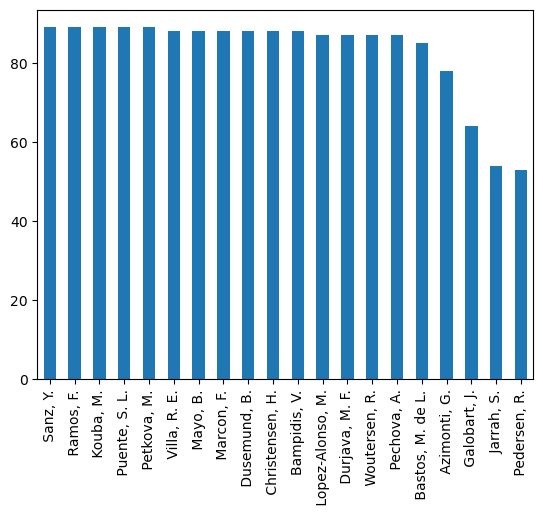

In [7]:
author_count = food_df_authors["AU"].value_counts()
top_authors = author_count.nlargest(20).plot.bar()

In [611]:
# For Tabaleu
tab1_df = pd.DataFrame(food_df_authors["AU"].value_counts())
tab1_df.to_excel("Author_count.xlsx")

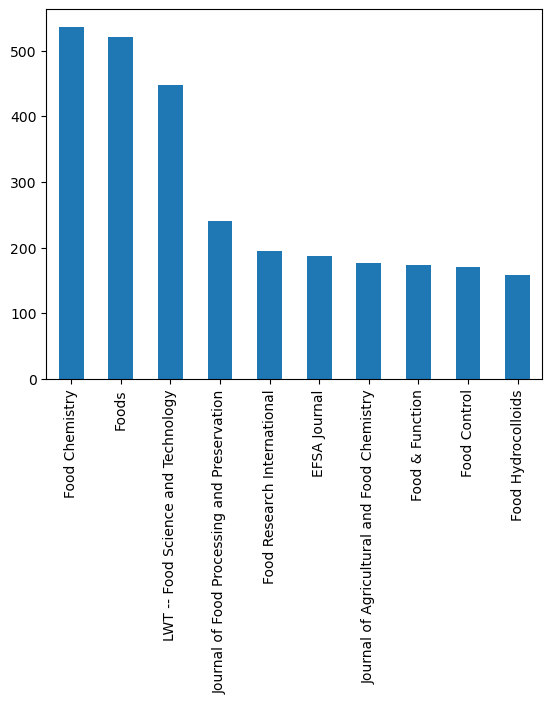

In [8]:
journal_name_count = food_df["SO"].value_counts()
top_journals = journal_name_count.nlargest(10).plot.bar()

In [612]:
# For Tabaleu
tab2_df = pd.DataFrame(food_df_authors["SO"].value_counts())
tab2_df.to_excel("Journal_count.xlsx")

#### What can we do? : 

1. Clustering - Which articles are very closer to each other (Similar to Amazon Book Clustering). 
2. IR - Any random text - Which book may have generated that string ? (Lecture 3 Pg. 45) - Using document language modeling 
3. Information Extraction: 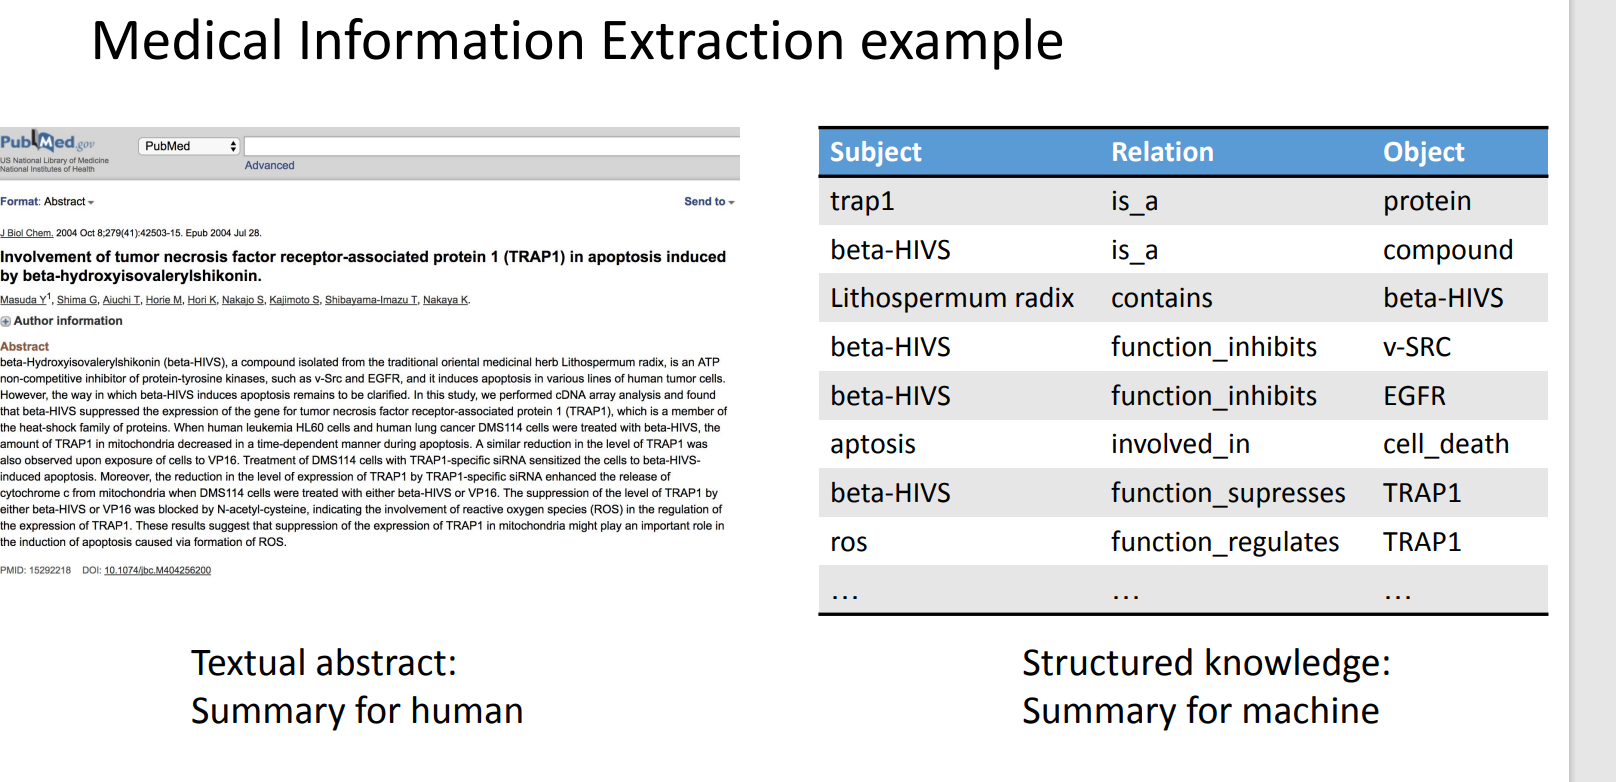 



In this we'll mainly focus on Information Extraction to extract what the different book sections may mean. The data we have is of food journals. There has been a lot of work done in the field of Medical Information with NLP, where the specific libraries were developed for Named-Entity recognition, making it very easy to find and form relations. Some notable mentions include en_ner_bc5cdr_md and even FoodIE for food reciepes. But in terms of food journal articles, this is yet to be introduced.

In this project we combine the computer and human effort to extract relevant information about the article. The pipeline we follow is : - 

1. Conduct a sentiment analysis of the abstract to see if the mentioned food article is related to a potential negative context. (Cancer, Tumor, Injury, etc.)
2. Train a word2vec model and find the aim, method and findings of the study (General we require these three to form a summary)
3. Make a DOc2vec model to perform LDA and know the Aboutness of the document(extended summary) 
4. Understanding structuring of abstracts - Improve Aboutness (3 rules are examined) (Information Extraction Summary)
5. Perform KNN clustering on the documents (Using Doc2vec and PCA)


### Cleaning Text

In [13]:
import re
def clean(text):
    
    #Remove anything after copyright symbol or all rights reserved (if detected)
    text = re.sub(r'\u00A9.*', '', text)
    text = re.sub(r'All rights reserved.*', '', text)
    
    #removing apostrophes
    text = re.sub("'s",'',str(text))
    
    #removing comma
    text = re.sub(",",'',str(text))
    pattern = r'\((.*?)\)'

    # Find all matches within the text
    matches = re.findall(pattern, text)

    # Iterate over the matches and replace them accordingly
    for match in matches:
        replacement = "(" + match.replace(".", "") + ")"
        text = text.replace(f"({match})", replacement)
    return text

# preprocessing Abstracts
food_df['AB_Clean'] = food_df['AB'].apply(clean)

## Tokenisation and Normalisation

In [39]:
import nltk
from nltk import word_tokenize

def spacy_tokenize(string):
    doc = word_tokenize(string)
    tokens = list(map(lambda token: token, doc))
    return tokens

#Normalize
def normalize(tokens):
    normalized_tokens = [token.lower().strip() for token in tokens]
    normalized_tokens = [token for token in normalized_tokens if len(token) > 1]
    normalized_tokens = [token for token in normalized_tokens if not re.match(r'^\d$', token)]
    normalized_tokens = [token for token in normalized_tokens if not re.match(r'^[:;.]+$', token)]
    normalized_tokens = [token for token in normalized_tokens if not re.match(r'^\d+:\d+$', token)]
    
    
    return normalized_tokens

#Tokenize and normalize
def tokenize_normalize(string):
    return normalize(spacy_tokenize(string))        

No lemmatisation or stemming because it removes the words such as mawp-70. We checked lemmatisers specifically for fields such as biotech but as of now there is no concerate way to use in Python 

In [45]:
all_posts_tokenized = food_df['AB_Clean'].apply(tokenize_normalize)

# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Remove stop words for each post separately
final_tokens = []

for post_tokens in all_posts_tokenized:
    filtered_tokens = [token for token in post_tokens if not nlp.vocab[token].is_stop]
    final_tokens.append(filtered_tokens)

In [46]:
all_posts_tokenized

0       [macrolepiota, albuminosa, berk, pegler, is, a...
1       [homogeneous, galactoglucan, was, purified, fr...
2       [homogeneous, beta-glucan, jhmp-70, was, obtai...
3       [novel, dispersive, micro-solid-phase, extract...
4       [the, yeast, saccharomyces, cerevisiae, is, ef...
                              ...                        
4995    [the, high, moisture, and, nutrient, contents,...
4996    [inhibition, of, salmonella, by, lactobacillus...
4997    [lipid, accumulation, is, major, factor, in, t...
4998    [soybean, milk, is, an, economical, substitute...
4999    [this, paper, reports, on, an, experimental, i...
Name: AB_Clean, Length: 4994, dtype: object

In [48]:
abstract_documents_df = pd.DataFrame({"Final_tokens" : final_tokens})
abstract_documents_df["Final_tokens"]

0       [macrolepiota, albuminosa, berk, pegler, abund...
1       [homogeneous, galactoglucan, purified, alkali-...
2       [homogeneous, beta-glucan, jhmp-70, obtained, ...
3       [novel, dispersive, micro-solid-phase, extract...
4       [yeast, saccharomyces, cerevisiae, effective, ...
                              ...                        
4989    [high, moisture, nutrient, contents, spiced, b...
4990    [inhibition, salmonella, lactobacillus, popula...
4991    [lipid, accumulation, major, factor, developme...
4992    [soybean, milk, economical, substitute, dairy,...
4993    [paper, reports, experimental, investigation, ...
Name: Final_tokens, Length: 4994, dtype: object

## Sentiment Analysis

In [567]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    sentences = nltk.sent_tokenize(text)  # Split text into sentences
    sentiment_scores = []
    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        sentiment_scores.append(sentiment['compound'])
    if sentiment_scores:
        average_score = sum(sentiment_scores) / len(sentiment_scores)
        return average_score
    else:
        return 0.0  # Return 0 if no sentences are found

food_df['Sentiment Score'] = abstract_documents_df['Final_tokens'].apply(get_sentiment_score)

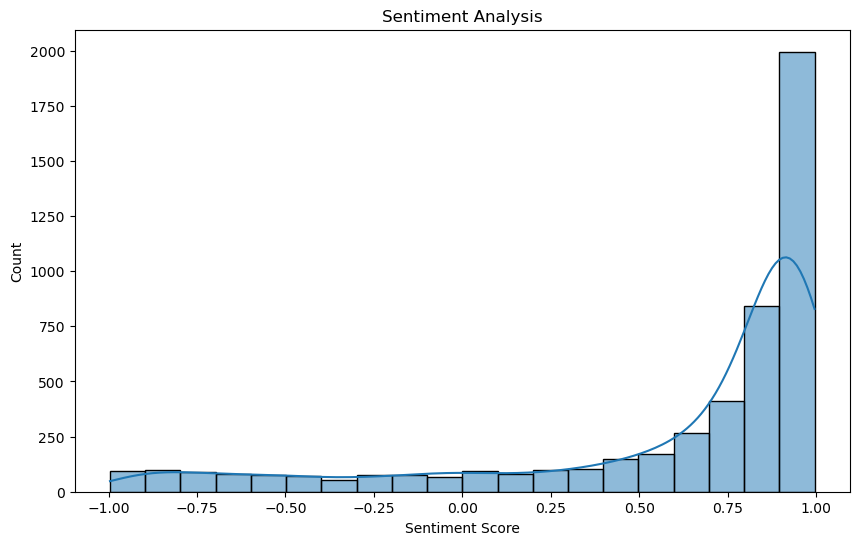

In [570]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(food_df['Sentiment Score'], bins=20, kde=True)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [616]:
potentially_dangerous_df = food_df[food_df["Sentiment Score"] < 0]

# For tabaleau
potentially_dangerous_df.to_excel("Potentially_dangerous_df.xlsx")

## Extracting Aim, Findings and Method

### Word2vec model - Gensim 

Skip_gram Gensim

1. Why gensim over other models such as BERT? :- Because BERT is known to work well with large datasets, but not achieve the same resutls with small data like ours. Additionally, here we are looking to incorporate as much domain knowledge as we can. 
2. Why Skip-gram over CBOW : This is because According to the original paper, Mikolov et al., it is found that Skip-Gram works well with small datasets, and can better represent less frequent words. However, CBOW is found to train faster than Skip-Gram, and can better represent more frequent words.

In [50]:
import gensim
import time

t0 = time.time()
model = gensim.models.Word2Vec(abstract_documents_df["Final_tokens"],window=5, vector_size=300, min_count=5, sg= 1, alpha=0.025,  batch_words=10000, seed=random_seed)
print ("done in %.02f s" % (time.time() - t0))

done in 13.68 s


### Aim

Identify those sentences that talk about aim. For this, we split entire abstract into individual sentences

In [72]:
from nltk.tokenize import sent_tokenize

# Create a dataframe containing sentences
food_df_ind = pd.DataFrame(columns=['AU','SO', 'TI', 'Sentence', 'Word_Len'])

# List of sentences for new df
row_list = []

# for-loop to go over the df abstracts
for i in food_df.index:
    
    # Split the abstract into sentences
    sentences = sent_tokenize(food_df.loc[i, 'AB_Clean'])

    for sent in sentences:
        
        # Number of words in that sentence
        wordcount = len(sent.split())  
        AU = food_df.loc[i, 'AU']  # AU
        SO = food_df.loc[i, 'SO']  # SO
        TI = food_df.loc[i, 'TI']  # TI

        dict1 = {'AU': AU, 'SO': SO, 'TI': TI, 'Sentence': sent, 'Word_Len': wordcount}  # Dictionary

        row_list.append(dict1)  # Append dictionary to list

food_df_ind = pd.DataFrame(row_list)

In [73]:
food_df_ind.head()

,AU,SO,TI,Sentence,Word_Len
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk) Pegler is abund...,19
1,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,In this study water-extracted polysaccharides ...,36
2,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Methylation and NMR analysis revealed MAWP-60p...,25
3,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,35
4,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,The molecular weight monosaccharide compositio...,24


In [75]:
model.wv.similar_by_word('aim', topn = 32)

[('aims', 0.9293311238288879),
 ('aimed', 0.9291303157806396),
 ('purpose', 0.8939880728721619),
 ('objective', 0.8819689750671387),
 ('objectives', 0.8674158453941345),
 ('sought', 0.8672453761100769),
 ('examine', 0.850642740726471),
 ('attempt', 0.8370639681816101),
 ('investigates', 0.8343781232833862),
 ('explore', 0.8305609226226807),
 ('remains', 0.826107919216156),
 ('evaluate', 0.8239322900772095),
 ('investigating', 0.8154957294464111),
 ('explores', 0.8111621141433716),
 ('unclear', 0.8110424876213074),
 ('goal', 0.808515191078186),
 ('focuses', 0.8075616955757141),
 ('characterize', 0.8065675497055054),
 ('planned', 0.8027645349502563),
 ('investigate', 0.8016782999038696),
 ('describes', 0.7998437881469727),
 ('undertaken', 0.7953764200210571),
 ('understood', 0.7918521165847778),
 ('unknown', 0.7904996871948242),
 ('evaluates', 0.7874667048454285),
 ('compare', 0.7858203649520874),
 ('reports', 0.7849861979484558),
 ('assessing', 0.782093346118927),
 ('clarify', 0.7820038

We'll cut at evaluates and use the first 31 most similar words

In [76]:
aim_closest_words = []
for i in range(0,31): 
    aim_closest_words.append(model.wv.similar_by_word('aim', topn = 31)[i][0])

We use our knowledge and drop words that are very far from aim such as unclear and unknown since they are rarely used to describe the aim specifically

In [78]:
aim_closest_words.remove('unclear')
aim_closest_words.remove("unknown")

In [79]:
len(aim_closest_words)

29

We use Lemmatisation in pattern matching because of the reason that it will detect any form of the verb, not limiting to actual word 

In [81]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def aim_check(text):
    flag = 0
    
    if len(text.split()) == 1:
        flag = 0
        
    else:
        lemmatizer = WordNetLemmatizer()
        patterns = [lemmatizer.lemmatize(word) for word in aim_closest_words]        
        
        for pat in patterns:
            if re.search(pat, text):
                flag = 1
                break
    return flag

# apply function
food_df_ind['Check_Aim'] = food_df_ind['Sentence'].apply(aim_check)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
# Sentences that contain the AIM words
count = 0
for i in range(len(food_df_ind)):
    if food_df_ind.loc[i,'Check_Aim'] == 1:
        count+=1
print(count)

6795


In [89]:
df = food_df_ind[food_df_ind['Check_Aim'] == 1]

# Group the aims by topic and store all the aims in a list
aims_list = df.groupby('TI')['Sentence'].apply(list).reset_index()

# Group the Aims by topic and count the number of aims for each topic
aim_counts = df.groupby('TI')['Sentence'].count().reset_index()

# Merge the aim_counts dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, aim_counts, on='TI', how='left')

# Group the aims by topic and store all the aims in a list
aims_list = df.groupby('TI')['Sentence'].apply(list).reset_index()
aims_list.columns = ['TI', 'Aims']

# Merge the aims_list dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, aims_list, on='TI', how='left')

# Print the resulting food_df dataframe
display(food_df)

,AU,SO,TI,AB,AB_Clean,Aim_Count,Aims
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...,Macrolepiota albuminosa (Berk) Pegler is abund...,1.0,[Methylation and NMR analysis revealed MAWP-60...
1,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...,A homogeneous galactoglucan was purified from ...,NaN,NaN
2,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...,A homogeneous beta-glucan (JHMP-70) was obtain...,1.0,[Its fine structure was investigated by FT-IR ...
3,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...,A novel dispersive micro-solid-phase extractio...,NaN,NaN
4,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...,The yeast Saccharomyces cerevisiae is effectiv...,1.0,[The seaweed B. Fusco-purpurea was taken as an...
...,...,...,...,...,...,...,...
4989,"[Dan Hai, Xianqing Huang, Lianjun Song]",Food Science & Nutrition,Effects of different modified atmosphere treat...,The high moisture and nutrient contents of spi...,The high moisture and nutrient contents of spi...,1.0,[Therefore for identifying packaging methods t...
4990,"[Dan Hai, Zhaoxin Lu, Xianqing Huang, Fengx...",Foods,In vitro screening of chicken-derived Lactobac...,Inhibition of Salmonella by Lactobacillus has ...,Inhibition of Salmonella by Lactobacillus has ...,NaN,NaN
4991,"[Dan He, Liping Yan, Jiaqi Zhang, Fang Li, ...",Food Science & Nutrition,Sargassum fusiforme polysaccharide attenuates ...,Lipid accumulation is a major factor in the de...,Lipid accumulation is a major factor in the de...,1.0,[In this study we investigated the ability of ...
4992,"[Dan Hu, Jinyong Wu, Long Jin, Lixia Yuan, ...",Food Research International,Evaluation of Pediococcus pentosaceus strains ...,Soybean milk is an economical substitute for d...,Soybean milk is an economical substitute for d...,1.0,[In this study four P. pentosaceus strains (CI...


### Results

Identify those sentences that talk about findings

In [93]:
model.wv.similar_by_word('findings', topn = 20)

[('conclusion', 0.7180213928222656),
 ('results', 0.6929501295089722),
 ('theoretical', 0.68683260679245),
 ('summary', 0.6794092059135437),
 ('altogether', 0.6743828654289246),
 ('insights', 0.6741606593132019),
 ('collectively', 0.6735146641731262),
 ('finding', 0.6649234890937805),
 ('taken', 0.6418663263320923),
 ('insight', 0.6415478587150574),
 ('lig', 0.6310626864433289),
 ('suggests', 0.6277757287025452),
 ('perspectives', 0.6274828910827637),
 ('avenue', 0.6182823181152344),
 ('mechanistic', 0.6147544980049133),
 ('neuroprotection', 0.613286018371582),
 ('possesses', 0.6116057634353638),
 ('ideas', 0.6089232563972473),
 ('provides', 0.6083049774169922),
 ('isomaltulose', 0.6054131388664246)]

We'll stop at overall and take the first 11 values

In [95]:
findings_closest_words = []
for i in range(0,11): 
    findings_closest_words.append(model.wv.similar_by_word('findings', topn = 11)[i][0])

 Here we use our domain knowledge and add the word "provides" and "revealed" to our list since it can be used in relation to findings

In [96]:
findings_closest_words.append("provides")
findings_closest_words.append("revealed")

In [98]:
def finding_check(text):
    
    flag = 0
    if len(text.split()) == 1:
        flag = 0
        
    else:
        lemmatizer = WordNetLemmatizer()
        patterns = [lemmatizer.lemmatize(word) for word in findings_closest_words]        
        
        for pat in patterns:
            if re.search(pat, text):
                flag = 1
                break
    return flag

# apply function
food_df_ind['Check_findings'] = food_df_ind['Sentence'].apply(finding_check)

In [100]:
# Sentences that contain the findings words
count = 0
for i in range(len(food_df_ind)):
    if food_df_ind.loc[i,'Check_findings'] == 1:
        count+=1
print(count)

5900


In [101]:
findings_df = food_df_ind[food_df_ind['Check_findings'] == 1]
findings_df.head()

,AU,SO,TI,Sentence,Word_Len,Check_Aim,Check_findings
2,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Methylation and NMR analysis revealed MAWP-60p...,25,1,1
14,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,This work provides a theoretical basis for the...,18,0,1
18,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,SEM observation revealed that there were micro...,14,0,1
32,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The seaweed B. Fusco-purpurea was taken as an ...,23,1,1
36,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,Our findings enrich the knowledge for the remo...,17,0,1


In [105]:
# Group the Findings by topic and store all the Findings in a list
findings_list = findings_df.groupby('TI')['Sentence'].apply(list).reset_index()

# Group the Findings by topic and count the number of Findings for each topic
findings_count = findings_df.groupby('TI')['Sentence'].count().reset_index()

# Merge the findings_count dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, findings_count, on='TI', how='left')

# Group the Findings by topic and store all the Findings in a list
findings_list = findings_df.groupby('TI')['Sentence'].apply(list).reset_index()
findings_list.columns = ['TI', 'Findings']

# Merge the findings_list dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, findings_list, on='TI', how='left')

# Print the resulting food_df dataframe
display(food_df.head())

,AU,SO,TI,AB,AB_Clean,Aim_Count,Aims,Findings_Count,Findings
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...,Macrolepiota albuminosa (Berk) Pegler is abund...,1.0,[Methylation and NMR analysis revealed MAWP-60...,1.0,[Methylation and NMR analysis revealed MAWP-60...
1,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...,A homogeneous galactoglucan was purified from ...,NaN,NaN,1.0,[This work provides a theoretical basis for th...
2,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...,A homogeneous beta-glucan (JHMP-70) was obtain...,1.0,[Its fine structure was investigated by FT-IR ...,1.0,[SEM observation revealed that there were micr...
3,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...,A novel dispersive micro-solid-phase extractio...,NaN,NaN,NaN,NaN
4,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...,The yeast Saccharomyces cerevisiae is effectiv...,1.0,[The seaweed B. Fusco-purpurea was taken as an...,2.0,[The seaweed B. Fusco-purpurea was taken as an...


In [106]:
food_df = food_df.fillna(0)

In [107]:
food_df.to_csv("Aim_findings.csv")

### Methods

Identify those sentences that talk about methods

In [108]:
model.wv.similar_by_word('methods', topn = 20)

[('techniques', 0.7345057725906372),
 ('analytical', 0.6771963834762573),
 ('method', 0.6644322872161865),
 ('conventional', 0.6615946888923645),
 ('methodologies', 0.6339436769485474),
 ('approaches', 0.6228013038635254),
 ('protocols', 0.617546796798706),
 ('enforcement', 0.6164707541465759),
 ('time-consuming', 0.6060815453529358),
 ('licorice', 0.6031767129898071),
 ('manual', 0.6026970148086548),
 ('reliable', 0.5928391814231873),
 ('procedures', 0.589899480342865),
 ('laboratories', 0.5865908265113831),
 ('adulterations', 0.5862692594528198),
 ('high-oa', 0.5854775309562683),
 ('sun', 0.5807267427444458),
 ('setup', 0.5796042084693909),
 ('automatic', 0.5795077681541443),
 ('bacteriological', 0.5793379545211792)]

We'll stop at procedures and take the first 10 values

In [110]:
methods_closest_words = []
for i in range(0,10): 
    methods_closest_words.append(model.wv.similar_by_word('methods', topn = 10)[i][0])

 Here we use our domain knowledge, remove "time-consuming", and add the word "mechanism" to our list

In [112]:
methods_closest_words.remove("time-consuming")
methods_closest_words.append("mechanism")

In [114]:
def method_check(text):
    
    flag = 0
    if len(text.split()) == 1:
        flag = 0
        
    else:
        lemmatizer = WordNetLemmatizer()
        patterns = [lemmatizer.lemmatize(word) for word in methods_closest_words]        
        
        for pat in patterns:
            if re.search(pat, text):
                flag = 1
                break
    return flag

# apply function
food_df_ind['Check_methods'] = food_df_ind['Sentence'].apply(method_check)

In [116]:
# Sentences that contain the findings words
count = 0
for i in range(len(food_df_ind)):
    if food_df_ind.loc[i,'Check_methods'] == 1:
        count+=1
print(count)

3708


In [117]:
methods_df = food_df_ind[food_df_ind['Check_methods'] == 1]
methods_df.head()

,AU,SO,TI,Sentence,Word_Len,Check_Aim,Check_findings,Check_methods
24,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...,33,0,0,1
25,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,In this method these analytes were extracted f...,30,0,0,1
26,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,The primary parameters affecting the extractio...,27,0,0,1
29,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,In general DMSPE is a convenient efficient and...,20,0,0,1
40,"[Yu-Yan Zhu, Xiang-Chun Meng, Ying-Jun Zhou,...",Journal of Food Biochemistry,Major royal jelly proteins alleviate non-alcoh...,"Next TOF to MRM (""TM"") widely targeted metabol...",53,1,0,1


In [121]:
# Group the methods by topic and store all the methods in a list
methods_list = methods_df.groupby('TI')['Sentence'].apply(list).reset_index()

# Group the methods by topic and count the number of methods for each topic
methods_count = methods_df.groupby('TI')['Sentence'].count().reset_index()

# Merge the methods_count dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, methods_count, on='TI', how='left')

# Group the methods by topic and store all the methods in a list
methods_list = methods_df.groupby('TI')['Sentence'].apply(list).reset_index()
methods_list.columns = ['TI', 'Methods']

# Merge the methods_list dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, methods_list, on='TI', how='left')

# Print the resulting food_df dataframe
display(food_df.head())

,AU,SO,TI,AB,AB_Clean,Aim_Count,Aims,Findings_Count,Findings,Methods_Count,Methods
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...,Macrolepiota albuminosa (Berk) Pegler is abund...,1.0,[Methylation and NMR analysis revealed MAWP-60...,1.0,[Methylation and NMR analysis revealed MAWP-60...,NaN,NaN
1,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...,A homogeneous galactoglucan was purified from ...,0.0,0,1.0,[This work provides a theoretical basis for th...,NaN,NaN
2,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...,A homogeneous beta-glucan (JHMP-70) was obtain...,1.0,[Its fine structure was investigated by FT-IR ...,1.0,[SEM observation revealed that there were micr...,NaN,NaN
3,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...,A novel dispersive micro-solid-phase extractio...,0.0,0,0.0,0,4.0,[A novel dispersive micro-solid-phase extracti...
4,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...,The yeast Saccharomyces cerevisiae is effectiv...,1.0,[The seaweed B. Fusco-purpurea was taken as an...,2.0,[The seaweed B. Fusco-purpurea was taken as an...,NaN,NaN


In [122]:
food_df = food_df.fillna(0)

In [123]:
food_df.to_csv("Aim_findings_Methods.csv")

In [350]:
food_df_ind.head()

,AU,SO,TI,Sentence,Word_Len,Check_Aim,Check_findings,Check_methods
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk) Pegler is abund...,19,0,0,0
1,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,In this study water-extracted polysaccharides ...,36,0,0,0
2,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Methylation and NMR analysis revealed MAWP-60p...,25,1,1,0
3,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,35,0,0,0
4,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,The molecular weight monosaccharide compositio...,24,0,0,0


## Word2vec model - Gensim 

In the PV-DM algorithm, each document is represented by a unique vector, similar to the word vectors in Word2Vec. These document vectors capture the overall context and meaning of the document.

During training, the PV-DM model tries to predict the target word based on both the document vector and the context words. The model uses the document vector as an additional input alongside the context words to generate the predicted probabilities for each word in the vocabulary.

This doc2vec will be used later in clustering as well.

In [52]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Build and train the model (it will take some time according to your system capabilities)

tagged_documents = [TaggedDocument(words=_d, tags=[i]) for i, _d in enumerate(abstract_documents_df["Final_tokens"])]

d2v_model = Doc2Vec(tagged_documents, vector_size=300, alpha=0.025, min_alpha=0.001, min_count=5, window=8, epochs=20, dm=1, seed=random_seed)
d2v_model.train(tagged_documents, total_examples = d2v_model.corpus_count, epochs=20, start_alpha=0.002, end_alpha=-0.016)

In [53]:
d2v_model.corpus_count

4994

In [54]:
abstract_documents_df["TI"] = food_df["TI"]
abstract_documents_df["SO"] = food_df["SO"]

abstract_documents_df.head()

,Final_tokens,TI,SO
0,"[macrolepiota, albuminosa, berk, pegler, abund...",Revealing the architecture and solution proper...,Food Chemistry
1,"[homogeneous, galactoglucan, purified, alkali-...",A branched galactoglucan with flexible chains ...,Food Chemistry
2,"[homogeneous, beta-glucan, jhmp-70, obtained, ...",Structural characterization and rheological pr...,Food Hydrocolloids
3,"[novel, dispersive, micro-solid-phase, extract...",Dispersive micro-solid-phase extraction of aca...,Food Analytical Methods
4,"[yeast, saccharomyces, cerevisiae, effective, ...",The identification of biotransformation pathwa...,Food Chemistry


## Aboutness Through LDA

In [124]:
for i, row in abstract_documents_df.iterrows():
    abstract_documents_df.at[i, 'Final_tokens'] = ' '.join(row['Final_tokens'])

# Print the updated dataframe
display(abstract_documents_df)

,Final_tokens,TI,SO
0,macrolepiota albuminosa berk pegler abundant a...,Revealing the architecture and solution proper...,Food Chemistry
1,homogeneous galactoglucan purified alkali-extr...,A branched galactoglucan with flexible chains ...,Food Chemistry
2,homogeneous beta-glucan jhmp-70 obtained hypsi...,Structural characterization and rheological pr...,Food Hydrocolloids
3,novel dispersive micro-solid-phase extraction ...,Dispersive micro-solid-phase extraction of aca...,Food Analytical Methods
4,yeast saccharomyces cerevisiae effective reduc...,The identification of biotransformation pathwa...,Food Chemistry
...,...,...,...
4989,high moisture nutrient contents spiced beef po...,Mothers choose a snack for their 2-3-year-old ...,Food Quality and Preference
4990,inhibition salmonella lactobacillus popular re...,Taqman probe based multiplex RT-PCR for simult...,LWT -- Food Science and Technology
4991,lipid accumulation major factor development no...,Curcumin nanoemulsions stabilized with natural...,Food Bioscience
4992,soybean milk economical substitute dairy produ...,Post-harvest fungal occurrence on commercial s...,Journal of Food Measurement and Characterization


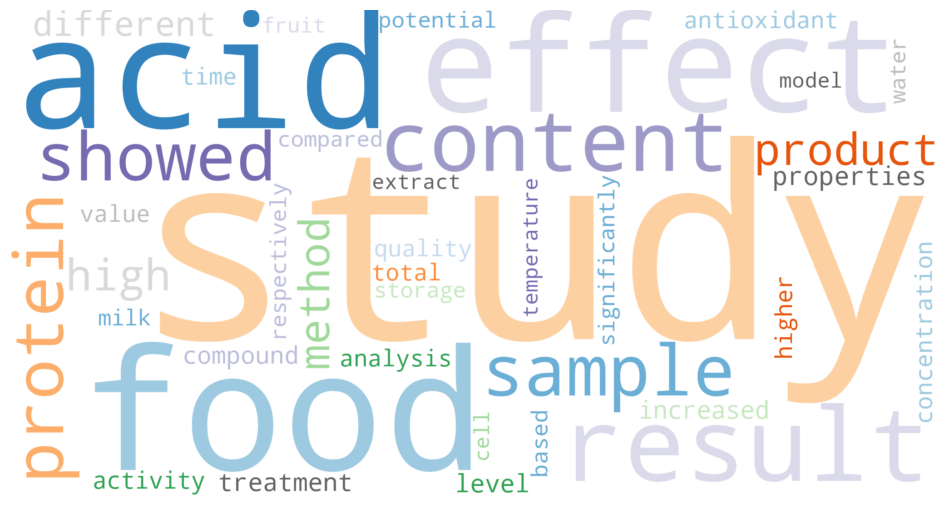

In [125]:
from wordcloud import WordCloud
abstracts = ' '.join(abstract_documents_df['Final_tokens'])

# generate Word Cloud
word_cloud = WordCloud(collocations=False,
 background_color='white',max_words=40, min_word_length=4,
 colormap='tab20c',width=2048, height=1080).generate(abstracts)
# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Finding Number of Topics for LDA

In [283]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=random_seed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [284]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=final_tokens, start=2, limit=42, step=6)

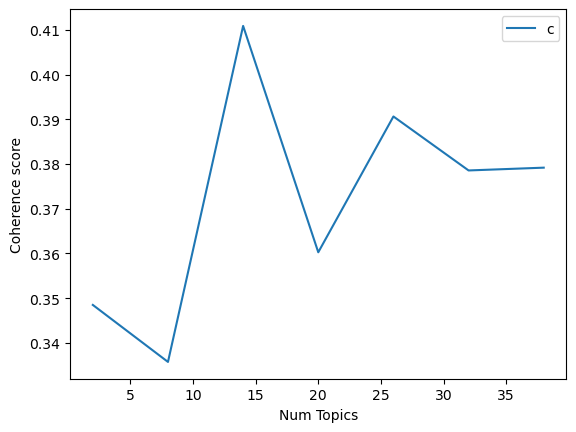

In [285]:
# Show graph
limit=42; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [287]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))

Num Topics = 2  has Coherence Value of 0.35
Num Topics = 8  has Coherence Value of 0.34
Num Topics = 14  has Coherence Value of 0.41
Num Topics = 20  has Coherence Value of 0.36
Num Topics = 26  has Coherence Value of 0.39
Num Topics = 32  has Coherence Value of 0.38
Num Topics = 38  has Coherence Value of 0.38


Num_topics = 14

In [292]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

documents = abstract_documents_df['Final_tokens'].tolist()

# Obtain document vectors from the Doc2Vec model
document_vectors = [d2v_model.infer_vector(doc.split()) for doc in documents]
# Create a list of tokenised documents
tokenised_documents = [doc.split() for doc in documents]

# Create a dictionary and corpus for LDA
dictionary = Dictionary(tokenised_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenised_documents]

# Perform LDA on the corpus
num_topics = 14  # Specify the number of topics you want to extract
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,  random_state=random_seed)

# Get the topic distribution for each document
topic_distributions = lda_model[corpus]

# Convert the topic distributions to a DataFrame for easier analysis
topics_df = pd.DataFrame([[topic[1] for topic in doc_topics] for doc_topics in topic_distributions],
                         columns=[f'Topic_{i+1}' for i in range(num_topics)])

# Concatenate the topics DataFrame with the original DataFrame
result_df = pd.concat([abstract_documents_df, topics_df], axis=1)

In [295]:
result_df

,Final_tokens,TI,SO,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14
0,macrolepiota albuminosa berk pegler abundant a...,Revealing the architecture and solution proper...,Food Chemistry,0.988628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,homogeneous galactoglucan purified alkali-extr...,A branched galactoglucan with flexible chains ...,Food Chemistry,0.329518,0.127631,0.533841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,homogeneous beta-glucan jhmp-70 obtained hypsi...,Structural characterization and rheological pr...,Food Hydrocolloids,0.360009,0.044637,0.345456,0.243635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,novel dispersive micro-solid-phase extraction ...,Dispersive micro-solid-phase extraction of aca...,Food Analytical Methods,0.991757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,yeast saccharomyces cerevisiae effective reduc...,The identification of biotransformation pathwa...,Food Chemistry,0.314077,0.676280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,high moisture nutrient contents spiced beef po...,Mothers choose a snack for their 2-3-year-old ...,Food Quality and Preference,0.670204,0.110614,0.106138,0.107325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4990,inhibition salmonella lactobacillus popular re...,Taqman probe based multiplex RT-PCR for simult...,LWT -- Food Science and Technology,0.740615,0.252837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4991,lipid accumulation major factor development no...,Curcumin nanoemulsions stabilized with natural...,Food Bioscience,0.094032,0.092686,0.780928,0.025478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4992,soybean milk economical substitute dairy produ...,Post-harvest fungal occurrence on commercial s...,Journal of Food Measurement and Characterization,0.216997,0.539004,0.238085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution, and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp[:10]])  # Display 5 keywords
                sent_topics_df.loc[i] = [int(topic_num), round(prop_topic, 4), topic_keywords]
            else:
                break
    
    # Add original text to the end of the output
    sent_topics_df['Text'] = pd.Series(texts)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=final_tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [319]:
df_dominant_topic.loc[31,"Keywords"]

'study, mice, expression, microbiota, effects, milk, gut, acid, effect, increased'

In [569]:
food_df.loc[31,"AB"]

'Ulcerative colitis (UC) is a chronic inflammatory bowel disease. The purpose of this study was to investigate the ameliorating effects of three yeast strains, Saccharomyces cerevisiae I4, Clavispora lusitaniae 30 and Pichia kudriavzevii 11, isolated from traditional fermented dairy food in Xinjiang, China, on the ulcerative colitis symptoms of Balb/c mice treated by dextran sulfate sodium (DSS). Among which, S. cerevisiae I4 had good tolerance to simulated gastrointestinal juice and strong adhesion to HT-29 cells monolayers. Furthermore, the three yeast strains were oral administered to Balb/c mice with DSS induced colitis. The weight loss, colon shortening and histological injury of colitis mice were ameliorated. Then, oral administration of S. cerevisiae I4 improved the immune state by reducing the contents of TNF-alpha, IL-6 and IL-1beta and increasing immunoglobulin. The relative expression of intestinal barrier proteins Claudin-1, Occludin and Zonula Occludins-1 (ZO-1) of the mic

## Understanding structuring of abstracts - Improving Aboutness

When we are trying to understand the structure, we cannot look at the entire abstract, that would take an eternity. 
To make our rule checking efficient we do two things - 

1. We find what length most of the sentences are and try to understand their structure. 
2. We define a function that checks how many sentences follow our pattern. This will give us a fair idea about how well the rule is performing, and whether, in fact, there is any such general structure in the corpus!

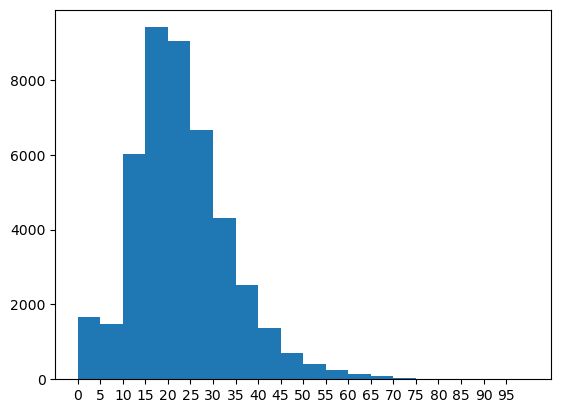

In [351]:
plt.hist(food_df_ind['Word_Len'],bins=20,range=[0,100])
plt.xticks(np.arange(0,100,5));

Most of the journal article contain 15-25 length sentences. So I am going to work with sentences that have no more than 20 words

In [354]:
food_df_ind.head()

,AU,SO,TI,Sentence,Word_Len,Check_Aim,Check_findings,Check_methods
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk) Pegler is abund...,19,0,0,0
1,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,In this study water-extracted polysaccharides ...,36,0,0,0
2,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Methylation and NMR analysis revealed MAWP-60p...,25,1,1,0
3,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,35,0,0,0
4,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,The molecular weight monosaccharide compositio...,24,0,0,0


In [355]:
row_list = []

# food_df_ind contains all sentences from all speeches

for i in range(len(food_df_ind)):
    
    sentence = food_df_ind.loc[i,'Sentence']
    
    if (',' not in sentence) and (len(sentence.split()) <= 20):
        
        TI = food_df_ind.loc[i,'TI']
        
        length = len(sentence.split())
        
        dict1 = {'TI':TI,'Sentence':sentence,'Word_Len':length}
        row_list.append(dict1)
        
# df with shorter sentences
food_df_ind_short = pd.DataFrame(columns=['Year','Sent',"Len"])
food_df_ind_short = pd.DataFrame(row_list)

Finally, let's make a fucntion to evaluate the result of our rule

In [383]:
# function to check output percentage for a rule
def output_per(df,out_col):
    
    result = 0
    
    for out in df[out_col]:
        if len(out)!=0:
            result+=1
    
    per = result/len(df)
    per *= 100
    
    return per

### Rule 1:  Noun-Verb-Noun Phrases

When you look at a sentence, it generally contains a subject (noun or proper noun), action (verb), and an object (noun). The rest of the words are just there to give us additional information about the entities. Therefore, we can leverage this basic structure to extract the main bits of information from the sentence. Take for example the following sentence:

In [617]:
food_df_ind_short.loc[5483,"Sentence"]

'Yellosp and Whitesp which are local sweetpotato varieties were also included as check for roots and leaves respectively.'

In [674]:
from spacy import displacy

doc = nlp(food_df_ind_short.loc[5483,"Sentence"])
displacy.render(doc, style='dep',jupyter=True)

What will be extracted from this sample sentence based on the rule is – “Whitesp are sweetpotato”. This should give us a fair idea about what the sentence is trying to say.

In [387]:
# Function for rule 1: noun(subject), verb, noun(object)
def rule1(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # If the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # Only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # Add subject to the phrase
                    phrase += sub_tok.text

                    # Save the root of the word in phrase
                    phrase += ' '+token.lemma_ 

                    # Check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # Save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [ ]:
# Create a df containing Sentenceence and its output for rule 1
# Apply rule1 function to all rows using vectorized operations
output = food_df_ind_short['Sentence'].apply(rule1)

# Create a new DataFrame with the desired columns
df_rule1 = pd.DataFrame({
    'TI': food_df_ind_short['TI'],
    'Sentence': food_df_ind_short['Sentence'],
    'Output': output
})

output_per(df_rule1,'Output')

In [393]:
output_per(df_rule1,'Output')

27.051893681238436

We are getting more than 20% pattern match for our rule, we can check it for all the sentences in the corpus.

In [394]:
# Apply rule1 function to all rows using vectorized operations
output = food_df_ind['Sentence'].apply(rule1)

# Create a new DataFrame with the desired columns
df_rule1_all = pd.DataFrame({
    'TI': food_df_ind['TI'],
    'Sentence': food_df_ind['Sentence'],
    'Output': output
})

# Check rule1 output on complete speeches
output_per(df_rule1_all,'Output')

32.142533731775785

We are getting more than a 30% match for our rules, which means 14,196 out of 44,172 sentences matched this pattern. Let’s form a new dataframe containing only those sentences that have an output and then segregate the verb from the nouns:

In [457]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule1_all.columns)

for row in range(len(df_rule1_all)):
    
    if len(df_rule1_all.loc[row,'Output'])!=0:
        df_show = pd.concat([df_show, df_rule1_all.loc[[row], :]])

# reset the index
df_show.reset_index(inplace=True)
df_show.drop('index',axis=1,inplace=True)

In [458]:
df_show.head()

,TI,Sentence,Output
0,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,[fractions exhibit conformation]
1,A branched galactoglucan with flexible chains ...,Showed it had a molecular weight of 210 kDa an...,[it have weight]
2,A branched galactoglucan with flexible chains ...,This work provides a theoretical basis for the...,[work provide basis]
3,Structural characterization and rheological pr...,This work can provide a basis theory to expand...,[work provide theory]
4,Dispersive micro-solid-phase extraction of aca...,Under the optimal conditions all target analyt...,[analytes have relationship]


In [459]:
df_show['Output'] = df_show['Output'].apply(lambda x: ''.join(x))
display(df_show)

,TI,Sentence,Output
0,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,fractions exhibit conformation
1,A branched galactoglucan with flexible chains ...,Showed it had a molecular weight of 210 kDa an...,it have weight
2,A branched galactoglucan with flexible chains ...,This work provides a theoretical basis for the...,work provide basis
3,Structural characterization and rheological pr...,This work can provide a basis theory to expand...,work provide theory
4,Dispersive micro-solid-phase extraction of aca...,Under the optimal conditions all target analyt...,analytes have relationship
...,...,...,...
14193,Sargassum fusiforme polysaccharide attenuates ...,Furthermore SFPS also suppressed the expressio...,SFPS suppress expression
14194,Sargassum fusiforme polysaccharide attenuates ...,We also found that SFPS ameliorated developmen...,SFPS ameliorate abnormalities
14195,Microwave intermittent drying characteristics ...,Results show that the microwave drying curve c...,curve consist period
14196,Microwave intermittent drying characteristics ...,As the microwave power and heating time increa...,power increase time


### Rule 2: Adjective Noun Structure

Determines the quality of the noun

In [624]:
text = 'We are aiming to achieve better results'
print(text)
doc = nlp(text)
img = displacy.render(doc, style='dep',jupyter=True)

We are aiming to achieve better results


What we are looking to achieve here is:  "better results".We look for tokens that have a Noun POS tag and have subject or object dependency, then we look at the child nodes of these tokens and append it to the phrase only if it modifies the noun.

In [476]:
# function for rule 2
def rule2(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [477]:
# Create a df containing Sentence and its output for rule 2
row_list = [
    
    {
        'TI': food_df_ind_short.loc[i, 'TI'],
        'Sentence': food_df_ind_short.loc[i, 'Sentence'],
        'Output': rule2(food_df_ind_short.loc[i, 'Sentence'])
    }
    for i in range(len(food_df_ind_short))
]

df_rule2 = pd.DataFrame(row_list)

In [478]:
# Rule 2 output
output_per(df_rule2,'Output')

82.64044396845487

82% of the short sentences match this rule. We can try now check it on the entire corpus.

In [479]:
row_list = [
    
    {
        'TI': food_df_ind.loc[i, 'TI'],
        'Sentence': food_df_ind.loc[i, 'Sentence'],
        'Output': rule2(food_df_ind.loc[i, 'Sentence'])
    }
    for i in range(len(food_df_ind))
]

df_rule2_all = pd.DataFrame(row_list)

# check rule output on complete speeches
output_per(df_rule2_all,'Output')

90.79507380240877

Now we can combine this rule along with the rule that we created previously. This will give us a better perspective of what information in present in a sentence.

In [481]:
def rule2_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    for token in doc:
        
        if token.i == index:
            
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [482]:
# rule 1 modified function
def rule1_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                        
                    adj = rule2_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                             
                            adj = rule2_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [483]:
# create a df containing Sentenceence and its output for modified rule 1
row_list = []

# food_df_ind contains all the Sentenceences from all the speeches
for i in range(len(food_df_ind)):
    
    Sentence = food_df_ind.loc[i,'Sentence']
    TI = food_df_ind.loc[i,'TI']
    output = rule1_mod(Sentence)
    dict1 = {'TI':TI,'Sentence':Sentence,'Output':output}
    row_list.append(dict1)
    
df_rule1_mod_all = pd.DataFrame(row_list)
# check rule1 output on complete speeches
output_per(df_rule1_mod_all,'Output')

32.142533731775785

In [485]:
# selecting non-empty output rows
df_show_mod = pd.DataFrame(columns=df_rule1_mod_all.columns)

for row in range(len(df_rule1_mod_all)):
    
    if len(df_rule1_mod_all.loc[row,'Output'])!=0:
        df_show_mod = pd.concat([df_show_mod, df_rule1_mod_all.loc[[row], :]])

# reset the index
df_show_mod.reset_index(inplace=True)
df_show_mod.drop('index',axis=1,inplace=True)

In [489]:
df_show_mod['Output'] = df_show_mod['Output'].apply(lambda x: ''.join(x))
display(df_show_mod)

,TI,Sentence,Output
0,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,fractions exhibit random conformation
1,A branched galactoglucan with flexible chains ...,Showed it had a molecular weight of 210 kDa an...,it have molecular weight
2,A branched galactoglucan with flexible chains ...,This work provides a theoretical basis for the...,work provide theoretical basis
3,Structural characterization and rheological pr...,This work can provide a basis theory to expand...,work provide theory
4,Dispersive micro-solid-phase extraction of aca...,Under the optimal conditions all target analyt...,analytes have good linear relationship
...,...,...,...
14193,Sargassum fusiforme polysaccharide attenuates ...,Furthermore SFPS also suppressed the expressio...,SFPS suppress expression
14194,Sargassum fusiforme polysaccharide attenuates ...,We also found that SFPS ameliorated developmen...,SFPS ameliorate developmental abnormalities
14195,Microwave intermittent drying characteristics ...,Results show that the microwave drying curve c...,curve consist constant period
14196,Microwave intermittent drying characteristics ...,As the microwave power and heating time increa...,power increase time


### Rule on Prepositions


Prepositions tell us where or when something is in relationship with something else. For example, The people of* India believe in the priciples of United Nations.*. Clearly extarcting phrases inclusing prepositions will give us a lot of information from the sentence. This is exactly what we are going to achieve with this rule.

Let's try to understand how this rule works by going over it on a sample sentece - "We have confirmed the presence of mawp-60"

We iterate over all the tokens looking for prepositions, i.e. of. On encountering a preposition, we check if it has a head word that is a noun, i.e. presence.Then we look at the child tokens of the preposition token falling on its right side, i.e. mawp-60.
This should finally extract the phrase "presence of mawp-60"

In [625]:
text = "We have confirmed the presence of mawp-60"
print(text)
doc = nlp(text)
img = displacy.render(doc, style='dep',jupyter=True)
img

#output_path = Path("./img3.svg")
# output_path.open("w", encoding="utf-8").write(img)
# displacy.render(doc, style='dep',jupyter=True)

We have confirmed the presence of mawp-60


In [493]:
# rule 3 function
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [494]:
# create a df containing Sentenceence and its output for rule 4
row_list = []

for i in range(len(food_df_ind_short)):
    
    Sentence = food_df_ind_short.loc[i,'Sentence']
    TI = food_df_ind_short.loc[i,'TI']
    
    # Rule 3
    output = rule3(Sentence)
    
    dict1 = {'TI':TI,'Sentence':Sentence,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)
# Rule 3 achieves 40% result
output_per(df_rule3,'Output')

60.057443286924354

About 60% of the sentences follow this rule.

In [495]:
# create a df containing Sentenceence and its output for rule 1
row_list = []

# food_df_ind contains all the Sentenceences from all the speeches
for i in range(len(food_df_ind)):
    
    Sentence = food_df_ind.loc[i,'Sentence']
    TI = food_df_ind.loc[i,'TI']
    output = rule3(Sentence)  # Output
    dict1 = {'TI':TI,'Sentence':Sentence,'Output':output}
    row_list.append(dict1)
    
df_rule3_all = pd.DataFrame(row_list)
# check rule1 output on complete speeches
output_per(df_rule3_all,'Output')

75.61351082133478

Show only those sentences that have outputs

In [497]:
# select non-empty outputs
df_show3 = pd.DataFrame(columns=df_rule3_all.columns)

for row in range(len(df_rule3_all)):
    
    if len(df_rule3_all.loc[row,'Output'])!=0:
        df_show3 = pd.concat([df_show3, df_rule3_all.loc[[row], :]])

# reset the index
df_show3.reset_index(inplace=True)
df_show3.drop('index',axis=1,inplace=True)    

In [499]:
df_show3

,TI,Sentence,Output
0,Revealing the architecture and solution proper...,In this study water-extracted polysaccharides ...,"[polysaccharides from albuminosa, fractions wi..."
1,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,[viscosity due radius]
2,Revealing the architecture and solution proper...,The molecular weight monosaccharide compositio...,"[contributors to size, size of chains]"
3,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...,[basidioma of albuminosa]
4,A branched galactoglucan with flexible chains ...,Showed it had a molecular weight of 210 kDa an...,[weight of kDa]
...,...,...,...
33395,Microwave intermittent drying characteristics ...,Drying is the first step in the processing of ...,"[step in processing, processing of Camellia, s..."
33396,Microwave intermittent drying characteristics ...,However several disadvantages of hot-air dryin...,"[disadvantages of drying, slowness of process]"
33397,Microwave intermittent drying characteristics ...,Microwave intermittent drying is a type of dis...,[type of drying]
33398,Microwave intermittent drying characteristics ...,The moisture and temperature inside the materi...,[moisture inside material]


Certainly we need to include the modifiers attached to the nouns in the phrase, like we did in rule 2. This would definitely increase the comprehensibility of the extracted phrase.

This rule can be easily modified to include the new change. I have created a new function to extract the noun modifiers for nouns that we extracted from rule 3.

In [500]:
# rule 0
def rule0(text, index):
    
    doc = nlp(text)
        
    token = doc[index]
    
    entity = ''
    
    for sub_tok in token.children:
        if (sub_tok.dep_ in ['compound','amod']):# and (sub_tok.pos_ in ['NOUN','PROPN']):
            entity += sub_tok.text+' '
    
    entity += token.text

    return entity

All we have to do is call this function whenever we encounter a noun in our phrase.

In [501]:
# rule 3 function
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        if token.pos_=='ADP':

            phrase = ''
            if token.head.pos_=='NOUN':
                
                # appended rule
                append = rule0(text, token.head.i)
                if len(append)!=0:
                    phrase += append
                else:  
                    phrase += token.head.text
                phrase += ' '+token.text

                for right_tok in token.rights:
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        
                        right_phrase = ''
                        # appended rule
                        append = rule0(text, right_tok.i)
                        if len(append)!=0:
                            right_phrase += ' '+append
                        else:
                            right_phrase += ' '+right_tok.text
                            
                        phrase += right_phrase
                
                if len(phrase)>2:
                    sent.append(phrase)
                

    return sent

In [503]:
# create a df containing Sentenceence and its output for rule 3
row_list = []

for i in range(len(df_show3)):
    
    Sentence = df_show3.loc[i,'Sentence']
    TI = df_show3.loc[i,'TI']
    output = rule3_mod(Sentence)
    dict1 = {'TI':TI,'Sentence':Sentence,'Output':output}
    row_list.append(dict1)
    
df_rule3_mod = pd.DataFrame(row_list)

In [537]:
df_rule3_mod.head()

,TI,Sentence,Output
0,Revealing the architecture and solution proper...,In this study water-extracted polysaccharides ...,[study extracted polysaccharides from M. album...
1,Revealing the architecture and solution proper...,Besides three fractions exhibited random coil ...,[highest viscosity due mean square radius]
2,Revealing the architecture and solution proper...,The molecular weight monosaccharide compositio...,[major contributors to flexibility molecular s...
3,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...,[basidioma of Macrolepiota albuminosa]
4,A branched galactoglucan with flexible chains ...,Showed it had a molecular weight of 210 kDa an...,[molecular weight of kDa]


In [540]:
df_rule3_mod['Output']  = df_rule3_mod['Output'].apply(lambda x: ''.join(x))

In [541]:
# Group the aims by topic and store all the aims in a list
output_list = df_rule3_mod.groupby('TI')['Output'].apply(list).reset_index()
output_list

# Merge the aim_counts dataframe with food_df based on the 'TI' column
food_df = pd.merge(food_df, output_list, on='TI', how='left')

# Print the resulting food_df dataframe
display(food_df)

,AU,SO,TI,AB,AB_Clean,Aim_Count,Aims,Findings_Count,Findings,Methods_Count,Methods,Keywords_LDA,Output_x,Output
0,"[Yu-Xiao Wang, Yue Xin, Jun-Yi Yin, Xiao-Ju...",Food Chemistry,Revealing the architecture and solution proper...,Macrolepiota albuminosa (Berk.) Pegler is abun...,Macrolepiota albuminosa (Berk) Pegler is abund...,1.0,[Methylation and NMR analysis revealed MAWP-60...,1.0,[Methylation and NMR analysis revealed MAWP-60...,0.0,0,"study, samples, quality, showed, activity, aci...",[ fractions exhibit random conformation],[study extracted polysaccharides from M. album...
1,"[Yu-Xiao Wang, Yue Xin, Xiao-Jun Huang, Jun...",Food Chemistry,A branched galactoglucan with flexible chains ...,A homogeneous galactoglucan was purified from ...,A homogeneous galactoglucan was purified from ...,0.0,0,1.0,[This work provides a theoretical basis for th...,0.0,0,"study, samples, quality, showed, activity, aci...","[ it have molecular weight, work provide theo...","[basidioma of Macrolepiota albuminosa, molecul..."
2,"[Yu-Xiao Wang, Ting Zhang, Jun-Yi Yin, Xiao...",Food Hydrocolloids,Structural characterization and rheological pr...,A homogeneous beta-glucan (JHMP-70) was obtain...,A homogeneous beta-glucan (JHMP-70) was obtain...,1.0,[Its fine structure was investigated by FT-IR ...,1.0,[SEM observation revealed that there were micr...,0.0,0,"properties, antioxidant, content, showed, stud...",[ work provide theory],"[apparent molecular weight of kDa, 3)-linked G..."
3,"[Yu-Xin Gu, Tian-Ci Yan, Zi-Xuan Yue, Min-H...",Food Analytical Methods,Dispersive micro-solid-phase extraction of aca...,A novel dispersive micro-solid-phase extractio...,A novel dispersive micro-solid-phase extractio...,0.0,0,0.0,0,4.0,[A novel dispersive micro-solid-phase extracti...,"wines, extraction, method, wine, results, food...",[ analytes have good linear relationship],[determination of acaricidesdetermination in f...
4,"[Yu-Xue Xu, Ze-Dong Jiang, Xi-Ping Du, Ming...",Food Chemistry,The identification of biotransformation pathwa...,The yeast Saccharomyces cerevisiae is effectiv...,The yeast Saccharomyces cerevisiae is effectiv...,1.0,[The seaweed B. Fusco-purpurea was taken as an...,2.0,[The seaweed B. Fusco-purpurea was taken as an...,0.0,0,"method, study, '', ``, food, analysis, results...","[ keto reductase synthase, findings enrich kn...","[fishy malodor of sea products, transformation..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,"[Dan Hai, Xianqing Huang, Lianjun Song]",Food Science & Nutrition,Effects of different modified atmosphere treat...,The high moisture and nutrient contents of spi...,The high moisture and nutrient contents of spi...,1.0,[Therefore for identifying packaging methods t...,0.0,0,1.0,[Therefore for identifying packaging methods t...,"food, study, properties, quality, different, s...","[ study investigate effects, CO2 show stronge...",[nutrient contents of spiced beefpresent chall...
4990,"[Dan Hai, Zhaoxin Lu, Xianqing Huang, Fengx...",Foods,In vitro screening of chicken-derived Lactobac...,Inhibition of Salmonella by Lactobacillus has ...,Inhibition of Salmonella by Lactobacillus has ...,0.0,0,3.0,[In this study 89 strains of Lactobacillus fro...,1.0,[In this study 89 strains of Lactobacillus fro...,"study, mice, expression, microbiota, effects, ...",[ inhibition derive Lactobacillus isolated chi...,[Inhibition of SalmonellaInhibition by Lactoba...
4991,"[Dan He, Liping Yan, Jiaqi Zhang, Fang Li, ...",Food Science & Nutrition,Sargassum fusiforme polysaccharide attenuates ...,Lipid accumulation is a major factor in the de...,Lipid accumulation is a major factor in the de...,1.0,[In this study we investigated the ability of ...,2.0,[The results indicated that SFPS significantly...,0.0,0,"study, mice, expression, microbiota, effects, ...","[ we investigate ability, SFPS decrease accum...",[major factor in developmentdevelopment of liv...
4992,"[Dan Hu, Jinyong Wu, Long Jin, Lixia Yuan, ...",Food Research Internat

In [628]:
food_df.rename(columns = {"Output" : "Extended Summary"}, inplace = True)

In [675]:
food_df.rename(columns = {"Extended Summary" : "I.E. Summary"}, inplace = True)

In [630]:
food_df.rename(columns = {"TI" : "Topic"}, inplace = True)

## Clustering of the documents

In [641]:
d2v_model.corpus_count

4994

In [637]:
d2v_model.wv.vectors.shape

(12468, 300)

In [645]:
d2v_model.docvecs

In [649]:
abstract_documents_df

,Final_tokens,TI,SO
0,macrolepiota albuminosa berk pegler abundant a...,Revealing the architecture and solution proper...,Food Chemistry
1,homogeneous galactoglucan purified alkali-extr...,A branched galactoglucan with flexible chains ...,Food Chemistry
2,homogeneous beta-glucan jhmp-70 obtained hypsi...,Structural characterization and rheological pr...,Food Hydrocolloids
3,novel dispersive micro-solid-phase extraction ...,Dispersive micro-solid-phase extraction of aca...,Food Analytical Methods
4,yeast saccharomyces cerevisiae effective reduc...,The identification of biotransformation pathwa...,Food Chemistry
...,...,...,...
4989,high moisture nutrient contents spiced beef po...,Mothers choose a snack for their 2-3-year-old ...,Food Quality and Preference
4990,inhibition salmonella lactobacillus popular re...,Taqman probe based multiplex RT-PCR for simult...,LWT -- Food Science and Technology
4991,lipid accumulation major factor development no...,Curcumin nanoemulsions stabilized with natural...,Food Bioscience
4992,soybean milk economical substitute dairy produ...,Post-harvest fungal occurrence on commercial s...,Journal of Food Measurement and Characterization


In [654]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Prepare document vectors
document_vectors = [d2v_model.infer_vector(doc.split()) for doc in abstract_documents_df['Final_tokens']]

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=200)
labels = kmeans_model.fit_predict(document_vectors)

# Perform PCA for visualization
pca = PCA(n_components=2).fit_transform(document_vectors)

# Create a DataFrame for the scatter plot
df = pd.DataFrame(pca, columns=['x', 'y'])
df['Label'] = labels
df['Document Title'] = abstract_documents_df['TI']
df['Journal_title'] = abstract_documents_df['SO']

# Create an interactive scatter plot with hover text
fig = px.scatter(df, x='x', y='y', color='Label', hover_data=['Journal_title'])

# Display the plot
fig.show()

In [672]:
food_df["X"] = df["x"]
food_df["Y"] = df["y"]
food_df["Label"] = df["Label"]
food_df["Article Number"] = food_df.index

In [676]:
food_df.to_excel("Final_Data.xlsx")